<a href="https://colab.research.google.com/github/xxxcrttt/CASA0018----DLSN/blob/main/3_1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 3-1. MNIST CNN

Information on the [MNIST](http://yann.lecun.com/exdb/mnist/) character dataset. 

Use Convolutions to try and improve the accuracry of the model. 

## Importing dependencies 

[Tensorflow datasets](https://www.tensorflow.org/datasets/catalog/overview)


In [20]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist

2.7.0


## Loading the image data 

it contains the training and testing values for the graphics that contain the clothing items and their labels. 


In [21]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Exploring the data and preparing it for use. 

**matplotlib.pyplot**:  
import a library to display an image and point it to a training image and a training label. 

Each of the 'pixel' values are between 0(black) and 255(white).  

To **"normalize"** the data between 0 ~ 1, divide all by 255.0  

shape: (28, 28)
Label: 0


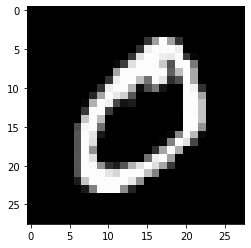

In [22]:
sample = 1;
print("shape:", training_images[sample].shape)

import matplotlib.pyplot as plt
plt.imshow(training_images[sample], cmap='gray')
print("Label:", training_labels[sample])

**First Change -- Input Shape**:
* Previously each image was being passed into the input layer -- (28 x 28) pixel image with 1 colour depth. 
* Now pass in all the data as a single list -- 60000 images -- which means the input tensor is (60000 x 28 x 28 x 1) items in a list. 


In [23]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

## Building the model 

* Use **sequential** to create the sequence of layers in a model. This model has 7 layers with the first 4 being a mix of convolution and pooling. 
* Use **Conv2d** to specify a convolutional layer and assign *64 conbolutions* of size (3 x 3). 
* Use **relu** (Rectified Linear Unit -- ReLU) activation function which converts any negative value to zero and define the input shape to be (28 x 28) pixels with 1 colour depth. 

   Relu函数：修正线性单元，$$ f(z) = max(0,z) $$ 
   
* In the second layer use **MaxPooling** to define a pooling layer which compresses the image while maintaining features. By specifying a size (2 x 2), to effectively quartering the size of the images. 

    池化层夹在连续的卷积层中间， 用于压缩数据和参数的量，减小过拟合。简而言之，如果输入是图像的话，那么池化层的最主要作用就是压缩图像，得到的是概要统计特征。
    Max_pooling: 整个图片被不重叠的分割成若干个大小相同的块(pooling size), 每个小块内只取最大的数字，舍弃其他节点后，保持原有的平面结构输出output
1. 特征 invariance(不变性) -- 包括 translation, rotation, scale -- 只是图像的resize
2. 特征降维 -- 保留主要特征的同时降低维度(类似于 PCA), 作用是防止过拟合，提高模型泛化能力
* repea the sampe pattern again for layers 3 & 4. 
* The remaining layers are the same as previous model architecture

  Layer 5 -- *Flatten* -- takes the previous layer and turns it into a 1 dimensional set. 
  
  Layer 6 -- *Dense* -- has 128 neurons and also uses 'relu'.

  Layer 7 -- *Dense* -- has 10 neurons which relate to 10 MNIST categories. use 'softmax' activation function which looks at all the probabilitis in that layer of neurons and sets the highest value to 1 and all other value to 0. 

In [24]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

**model.fit** -- built the model by compiling with an optimizer and loss function and then train it to fit the training data to the training labels.

The accuracy value at the end of the final epoch is 0.9953 -- 99% accuracy. 

In [25]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1251 - accuracy: 0.9616
Epoch 2/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0409 - accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 5/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0147 - accuracy: 0.9953


**model.evluate** -- report back the loss for each. 

In [26]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.0338 - accuracy: 0.9909


[0.033781908452510834, 0.9908999800682068]

## Extras 
**TensorBoard** -- find out where erroe or misclassifications are coming from, it provides a useful tool to check the model result and visualisations. 


In [27]:
import numpy as np
test_predictions = np.argmax(model.predict(test_images), axis=-1)
#test_predictions = model.predict_classes(test_images) - TF 2.6 弃用
result = tf.math.confusion_matrix(test_labels, test_predictions)
print(result)

tf.Tensor(
[[ 973    0    1    0    0    0    1    4    1    0]
 [   0 1127    4    0    1    1    0    2    0    0]
 [   0    0 1026    0    0    0    0    5    1    0]
 [   0    0    1 1004    0    2    0    3    0    0]
 [   0    0    1    0  973    0    0    0    1    7]
 [   0    0    1    6    0  883    1    1    0    0]
 [   2    3    1    0    2    9  940    0    1    0]
 [   0    0    2    0    0    0    0 1026    0    0]
 [   1    0    4    1    0    2    0    2  962    2]
 [   2    0    0    0    4    2    0    5    1  995]], shape=(10, 10), dtype=int32)
